In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Rlake(k,gamma):
    # ice surface relaxation function (for grounded ice)
    # k = wavevector magnitude
    # gamma = basal drag parameter: beta0*H/(2*eta)
    g = gamma/k
    R1 =  (1/k)*((1+g)*np.exp(4*k) - (2+4*g*k)*np.exp(2*k) + 1 - g)
    D = (1+g)*np.exp(4*k) + (2*g+4*k+4*g*(k**2))*np.exp(2*k) -1 + g
    return R1/D

In [3]:
k = np.logspace(-2,2,num=1000)
R = (np.exp(4*k)+(4*k*np.exp(2*k))-1)/(k*(np.exp(4*k)-2*(1+2*(k**2))*np.exp(2*k)+1))
B = (2*(k+1)*np.exp(3*k)+2*(k-1)*np.exp(k))/(k*(np.exp(4*k)-2*(1+2*(k**2))*np.exp(2*k)+1))

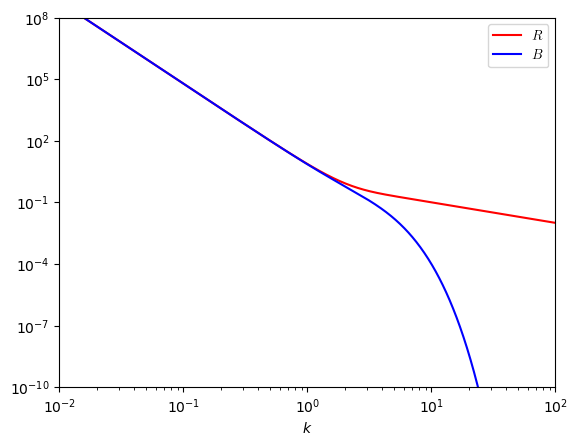

In [4]:
plt.loglog(k,R,color='r',label='$R$')
plt.loglog(k,B,color='b',label='$B$')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylim([1e-10,1e8])
plt.xlim([1e-2,1e2])
plt.xlabel('$k$')
plt.legend()

In [5]:
rhoi = 917
rhow = 1000
delta = (rhow/rhoi)-1
mu = np.sqrt(4*delta*(B**2)+(R**2)*((delta-1)**2))
lambdap = -((delta+1)/2)*R+(mu/2)
lambdam = -((delta+1)/2)*R-(mu/2)

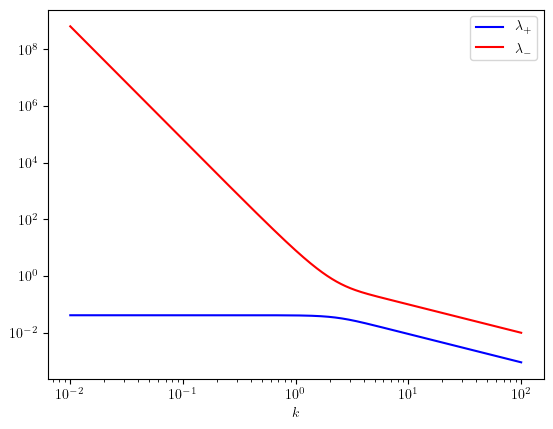

In [6]:
plt.loglog(k,-lambdap,color='b',label='$\lambda_{+}$')
plt.loglog(k,-lambdam,color='r',label='$\lambda_{-}$')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
# plt.ylim([1e-10,1e8])
# plt.xlim([1e-2,1e2])
plt.xlabel('$k$')
plt.legend()

In [7]:
te = -1/((1/2)*(delta/(1+delta)))
tp = 1/lambdap
tm = 1/lambdam

t_infty = (1/(2*delta))/Rlake(k,1e20)

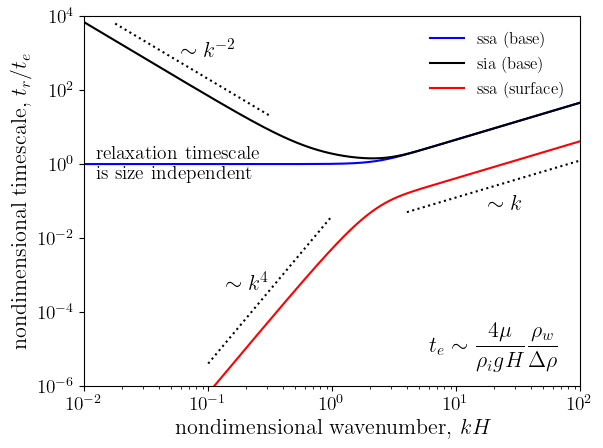

In [8]:
f = plt.figure()
plt.loglog(k,tp/te,color='b',label='ssa (base)')
plt.loglog(k,t_infty/((delta+1)/delta),color='k',label='sia (base)')
plt.loglog(k,tm/te,color='r',label='ssa (surface)')
plt.loglog(k[k>4],k[k>4]/80,':',color='k')
klower = np.logspace(-1,0,num=1000)
plt.loglog(klower,0.04*klower**(4),':',color='k')
kupper = np.logspace(-1.75,-0.5,num=1000)
plt.loglog(kupper,2*kupper**(-2),':',color='k')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylim([1e-6,1e4])
plt.xlim([1e-2,1e2])
plt.ylabel('nondimensional timescale, $t_r/t_e$',fontsize='16')
plt.xlabel('nondimensional wavenumber, $kH$',fontsize='16')
plt.legend(loc='upper right',frameon=False,fontsize='12')
# plt.legend(loc='upper left',frameon=True,bbox_to_anchor = (1.2, 1.045))
plt.text(0.06,8e2,'$\sim k^{-2}$',fontsize='16')
plt.text(0.14,4e-4,'$\sim k^{4}$',fontsize='16')
plt.text(18,0.06,'$\sim k$',fontsize='16')
plt.text(6,0.8e-5,'$$t_{e}\sim\\frac{4\mu}{\\rho_i g H} \\frac{\\rho_w}{\Delta \\rho}$$',fontsize='16')
plt.text(1.25e-2,4e-1,'relaxation timescale\n is size independent',fontsize='14')
plt.yticks(size=14)
plt.xticks(size=14)
f.savefig("ags_timescale_old.pdf",bbox_inches='tight')

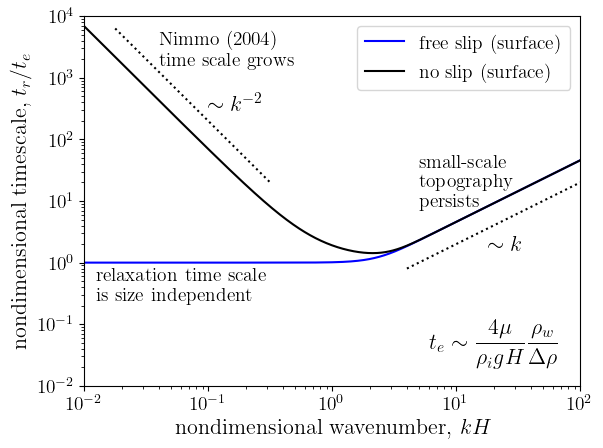

In [10]:
f = plt.figure()
plt.loglog(k,tp/te,color='b',label='free slip (surface)')
plt.loglog(k,t_infty/((delta+1)/delta),color='k',label='no slip (surface)')
# plt.loglog(k,tm/te,color='r',label='ssa (surface)')
plt.loglog(k[k>4],k[k>4]/5,':',color='k')
# klower = np.logspace(-1,0,num=1000)
# plt.loglog(klower,0.04*klower**(4),':',color='k')
kupper = np.logspace(-1.75,-0.5,num=1000)
plt.loglog(kupper,2*kupper**(-2),':',color='k')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.ylim([1e-2,1e4])
plt.xlim([1e-2,1e2])
plt.ylabel('nondimensional timescale, $t_r/t_e$',fontsize='16')
plt.xlabel('nondimensional wavenumber, $kH$',fontsize='16')
# plt.legend(loc='upper right',frameon=False,fontsize='14')
plt.legend(loc='upper right',fontsize='14')
# plt.legend(loc='upper left',frameon=True,bbox_to_anchor = (1.2, 1.045))
plt.text(0.1,3e2,'$\sim k^{-2}$',fontsize='16')
plt.text(18,1.6,'$\sim k$',fontsize='16')
plt.text(6,0.4e-1,'$$t_{e}\sim\\frac{4\mu}{\\rho_i g H} \\frac{\\rho_w}{\Delta \\rho}$$',fontsize='16')
# plt.text(0.03,0.5e-1,'$\mu \\nabla^2 u = \\nabla p$',fontsize='16')
# plt.text(0.034,0.16e-1,'$\\nabla\cdot u = 0$',fontsize='16')
# plt.text(0.018,1.4e-1,'linearized Stokes',fontsize='16')
plt.text(1.25e-2,2.4e-1,'relaxation time scale\n is size independent',fontsize='14')
plt.text(4e-2,1.6e3,'Nimmo (2004)\n time scale grows',fontsize='14')
plt.text(5,0.8e1,'small-scale\n topography \n persists',fontsize='14')
plt.yticks(size=14)
plt.xticks(size=14)
f.savefig("ags_timescale.pdf",bbox_inches='tight')